Somos una pequeña empresa especializada en la recolección, procesamiento y análisis de datos de restaurantes. Actualmente, nos limitamos a recibir diferentes clientes únicamente de la provincia de La Habana, Cuba. A continuación, mostramos una gráfica en la que se puede observar la cantidad de restaurantes por municipios que hemos analizado y de los cuales obtuvimos datos para satisfacer las peticiones de los clientes de este mes.

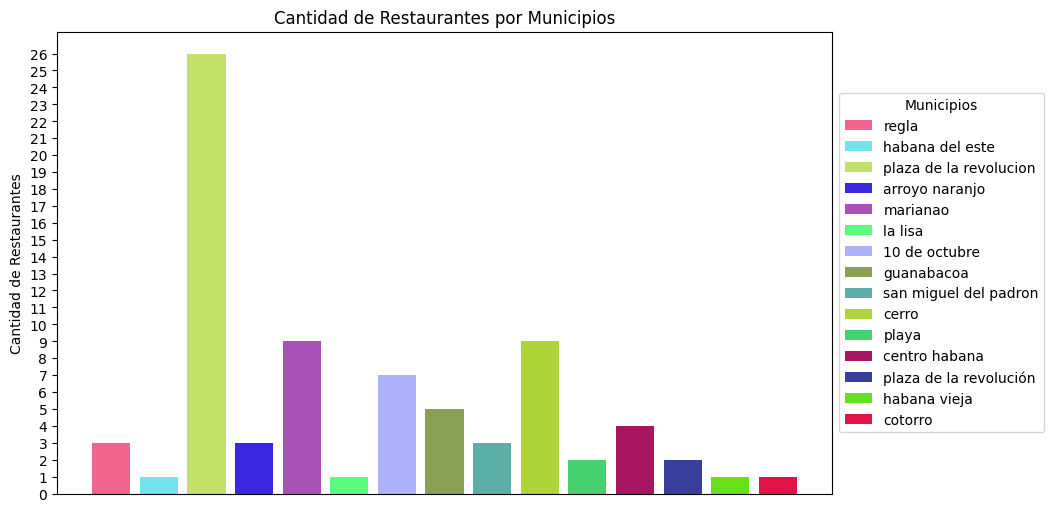

In [1]:
import matplotlib.pyplot as plt
import os
import json
import random

ruta_carpeta = "json"
archivos_json = os.listdir(ruta_carpeta) 

cantidad_restaurantes = {}
colors = {}

for i in archivos_json:
    with open(os.path.join(ruta_carpeta, i), "r", encoding="utf8") as f:
        datos = json.load(f)
        municipio = datos["municipality"].strip().lower() if "municipality" in datos and datos["municipality"] else None
        if municipio:
            if municipio not in cantidad_restaurantes:
                cantidad_restaurantes[municipio] = 1
                colors[municipio] = f'#{random.randint(0, 0xFFFFFF):06x}'
            else:
                cantidad_restaurantes[municipio] += 1


municipios = list(cantidad_restaurantes.keys())
cantidad_restaurantes_valores = list(cantidad_restaurantes.values())

plt.figure(figsize=(10, 6))  # Colocar plt.figure antes de crear los gráficos

for i, (municipio, cantidad) in enumerate(zip(municipios, cantidad_restaurantes_valores)): 
    plt.bar(i, cantidad, color=colors[municipio], label=municipio if municipio not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xticks([])
plt.yticks(range(0, max(cantidad_restaurantes_valores) + 1))
plt.ylabel('Cantidad de Restaurantes')
plt.title('Cantidad de Restaurantes por Municipios')
legend_title = "Municipios"
handles, labels = plt.gca().get_legend_handles_labels() 
plt.legend(handles, labels, title=legend_title, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid
plt.show()



El primer cliente del mes nos envió un correo electrónico solicitando ayuda para determinar la cantidad mínima de masas de pizza que necesitaría para abastecer a los restaurantes en La Habana. Por ello, realizamos una recolección de datos de los restaurantes que venden pizzas en la capital, llegando a la conclusión de que la cantidad aproximada de ellos ayudarían a establecer un aproximado de la cantidad de bases de pizza necesarias para abastecerlos considerablemente, cuyos resultados se muestran en la siguiente gráfica.

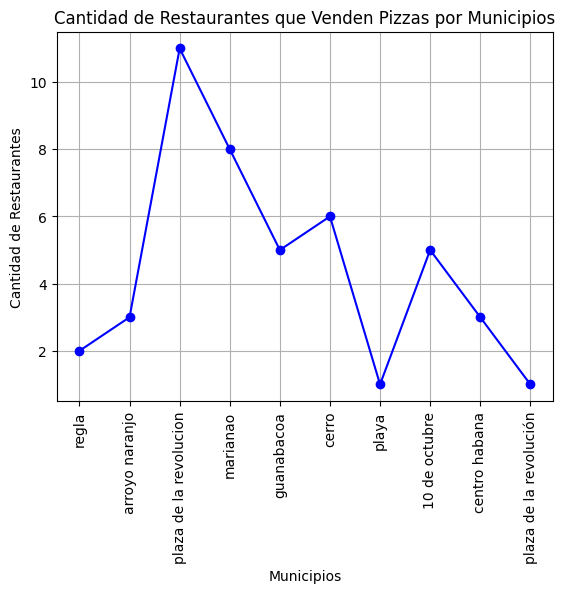

In [3]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

# lista de archivos JSON
ruta_carpeta = "json"
archivos_json = os.listdir(ruta_carpeta)

# diccionario para almacenar los restaurantes que venden pizzas por municipio
pizzas_por_municipios = {}

# Leer los menús desde cada archivo JSON y separar los restaurantes por localidad
for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta,archivo),"r", encoding="utf8") as f:
        datos = json.load(f)
        municipio = datos.get('municipality')
        municipio = municipio.strip().lower() 
        pizzas = datos['menu'].get('pizzas') 
    #para verificar si el menú de pizzas no es null y tiene datos 
    if pizzas:
       if municipio not in pizzas_por_municipios:
          pizzas_por_municipios[municipio] = 0
       pizzas_por_municipios[municipio] += 1
    
municipios = list(pizzas_por_municipios.keys())
cantidad_restaurantes = list(pizzas_por_municipios.values())

plt.plot(municipios, cantidad_restaurantes, marker='o', linestyle='-', color='blue')
plt.xlabel('Municipios')
plt.ylabel('Cantidad de Restaurantes')
plt.title('Cantidad de Restaurantes que Venden Pizzas por Municipios')
plt.xticks(rotation=90)
plt.grid()
plt.show()


El siguiente cliente del mes se trata de un turista extranjero que venía de visita a La Habana por una semana y estaba interesado en degustar de mayor cantidad de restaurantes posibles de la capital. El cliente deseaba probar un poco de cada plato fuerte, postres y bebidas, por lo que debía elegir un elemento de cada una de estas categorías con el precio mínimo, para que así el presupuesto del que nos habló (no tenemos permitido revelar esa información) fuera suficiente para su travesía por los restaurantes de la capital. De esta manera, podría visitar cada restaurante que ofrecía estas tres opciones.

In [6]:
import os
import json

ruta_carpeta = 'json'  
archivos_json = os.listdir(ruta_carpeta)

def extraer_valores_numericos(diccionario):
    lista_valores = []
    if isinstance(diccionario, dict):
        for clave, valor in diccionario.items():
            if isinstance(valor, dict):
                lista_valores.extend(extraer_valores_numericos(valor))
            elif isinstance(valor, (int, float)):
                lista_valores.append(valor)
    return lista_valores

for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta, archivo), "r", encoding="utf8") as f:
        datos = json.load(f)
        if 'menu' in datos and 'name' in datos:
            name = datos['name']
            primeros_valores = []

            if 'liquids' in datos['menu'] is not None:
                liquids = datos['menu']['liquids']
                valores_liquids = extraer_valores_numericos(liquids)
                valores_liquids.sort()
                if valores_liquids:
                    primeros_valores.append(valores_liquids[0])
                
            if 'desserts' in datos['menu'] and datos['menu']['desserts'] is not None:
                desserts = datos['menu']['desserts']
                valores_desserts = extraer_valores_numericos(desserts)
                valores_desserts.sort()
                if valores_desserts:
                    primeros_valores.append(valores_desserts[0])
                
            if 'strong_dishes' in datos['menu'] and datos['menu']['strong_dishes'] is not None:
                strong_dishes = datos['menu']['strong_dishes']
                valores_strong_dishes = extraer_valores_numericos(strong_dishes)
                valores_strong_dishes.sort()
                if valores_strong_dishes:
                    primeros_valores.append(valores_strong_dishes[0])
                
            if len(primeros_valores) == 3 :
               suma = sum(primeros_valores)
               if 'type_of_currency' in datos and datos['type_of_currency'] == "usd":
                   print (f'El presupuesto minimo que se necesita para comer en {name} y consumir un plato fuerte, un postre y una bebida es {suma} dolares, sin incluir el 10% o 5% del servicio')
               else:
                   print (f'El presupuesto minimo que se necesita para comer en {name} y consumir un plato fuerte, un postre y una bebida es {suma} pesos, sin incluir el 10% o 5% del servicio')



El presupuesto minimo que se necesita para comer en Asia Cuba y consumir un plato fuerte, un postre y una bebida es 2725 pesos, sin incluir el 10% o 5% del servicio
El presupuesto minimo que se necesita para comer en Atlanta y consumir un plato fuerte, un postre y una bebida es 2250.0 pesos, sin incluir el 10% o 5% del servicio
El presupuesto minimo que se necesita para comer en Bodegón del Asado y consumir un plato fuerte, un postre y una bebida es 1650 pesos, sin incluir el 10% o 5% del servicio
El presupuesto minimo que se necesita para comer en Aroma de Café y consumir un plato fuerte, un postre y una bebida es 440 pesos, sin incluir el 10% o 5% del servicio
El presupuesto minimo que se necesita para comer en Café D la Esquina y consumir un plato fuerte, un postre y una bebida es 2750 pesos, sin incluir el 10% o 5% del servicio
El presupuesto minimo que se necesita para comer en Casa Mía y consumir un plato fuerte, un postre y una bebida es 5550 pesos, sin incluir el 10% o 5% del s

El último trabajo del mes fue solicitado por un cliente que recientemente se había mudado a La Habana y no tenía mucho conocimiento sobre las calles y sitios de la capital. Este cliente deseaba visitar restaurantes en la capital, pero no conocía sus direcciones ni sabía cómo llegar. Por ello, le ofrecimos un mapa donde pudiera observar la ubicación de algunos de los restaurantes de la capital.


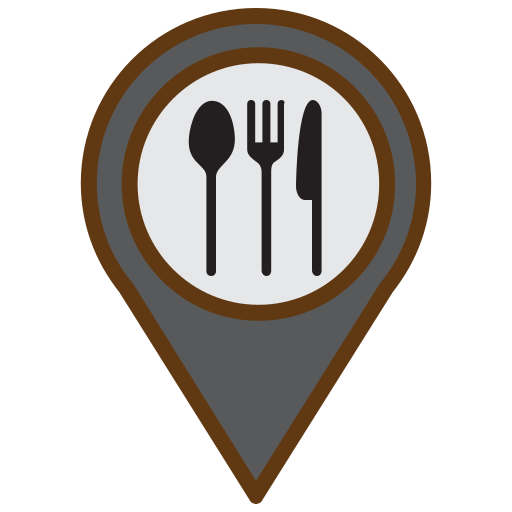
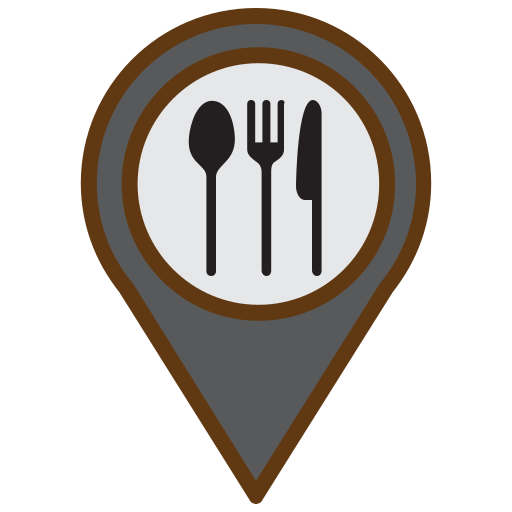
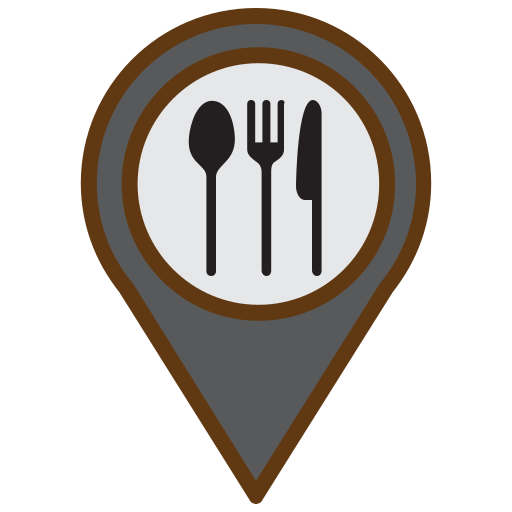
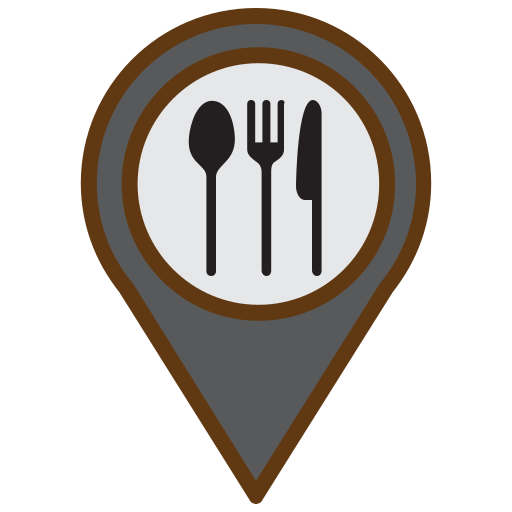
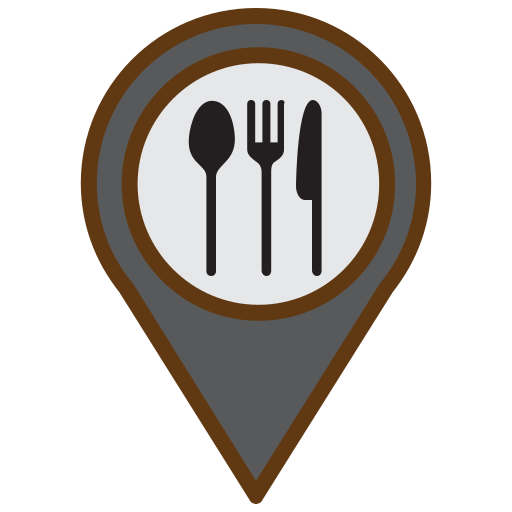
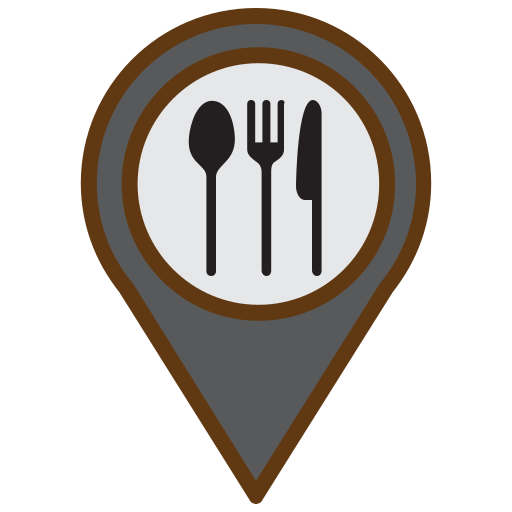
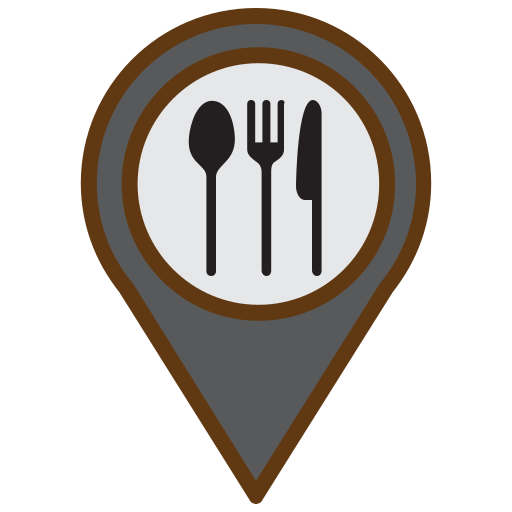
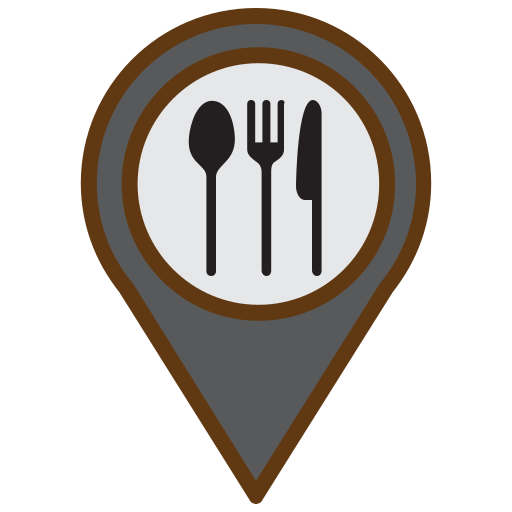
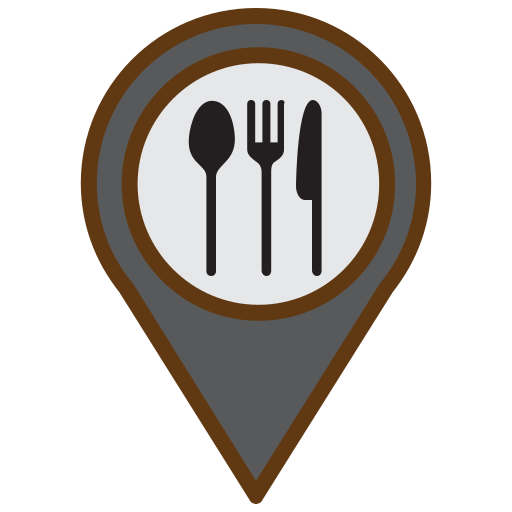
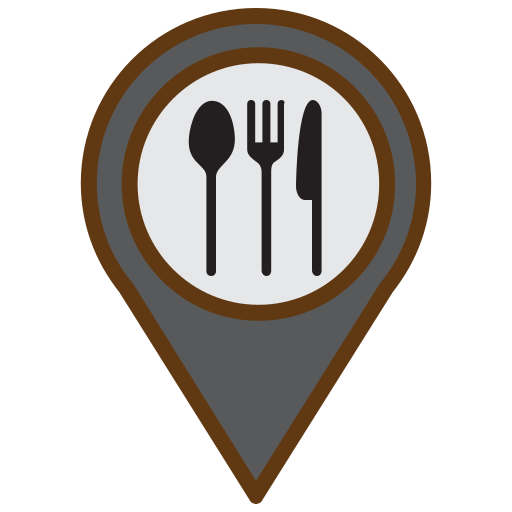
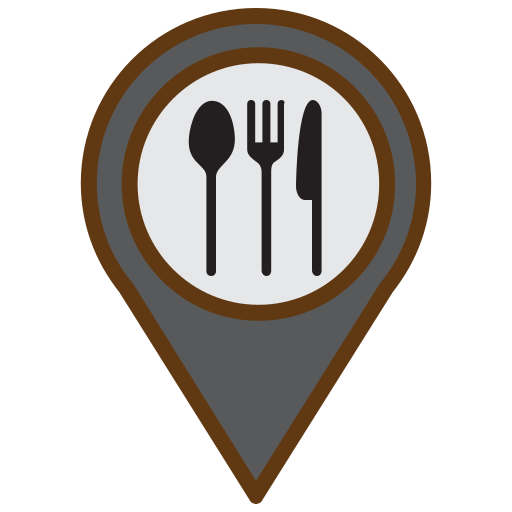
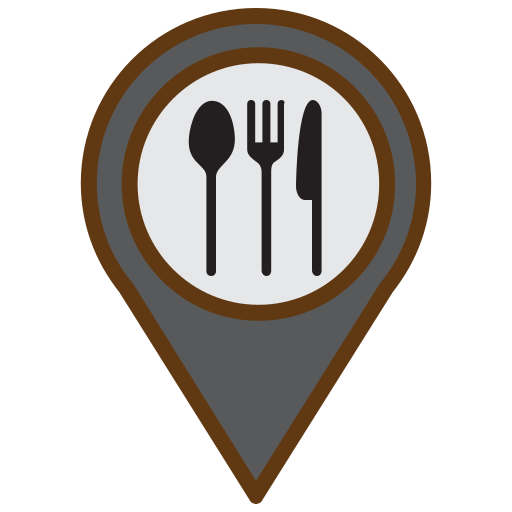
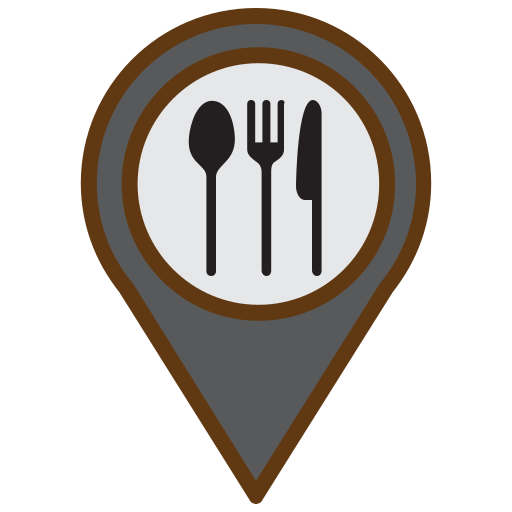
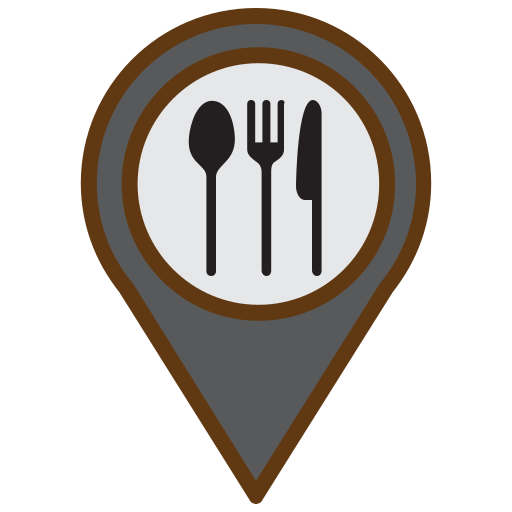
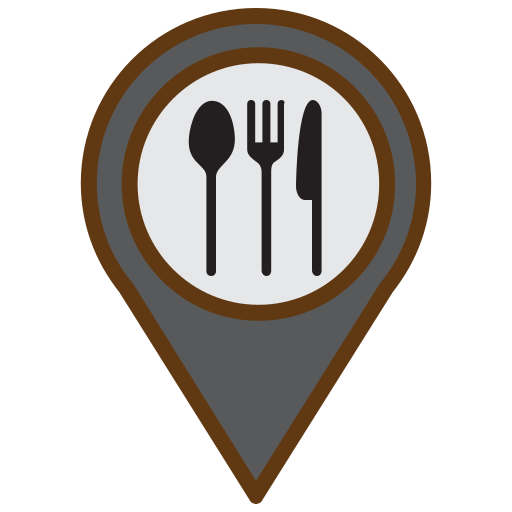
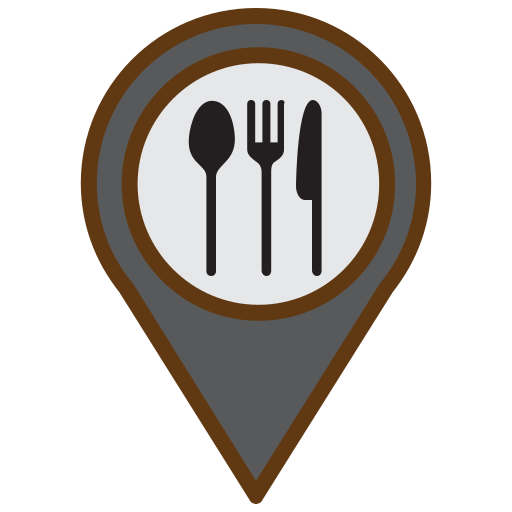
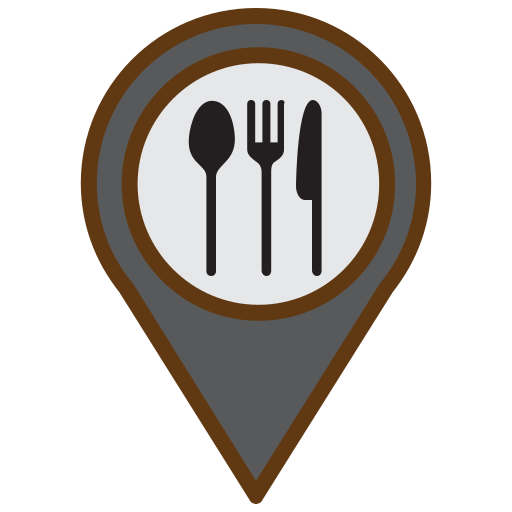
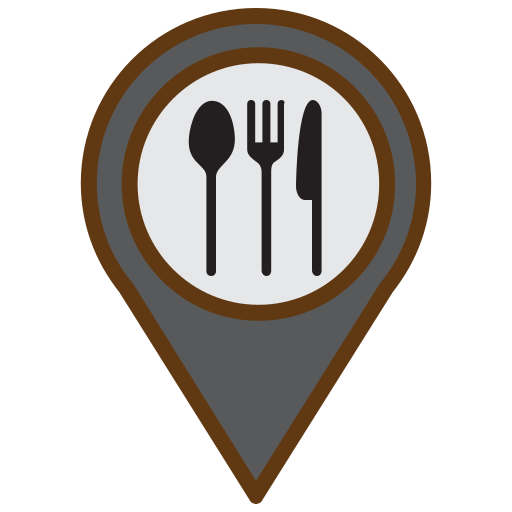
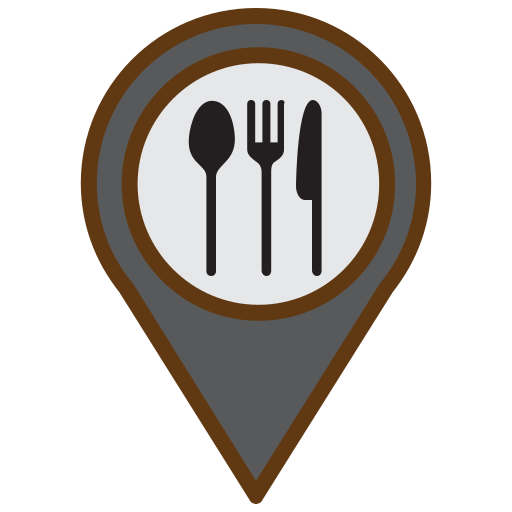
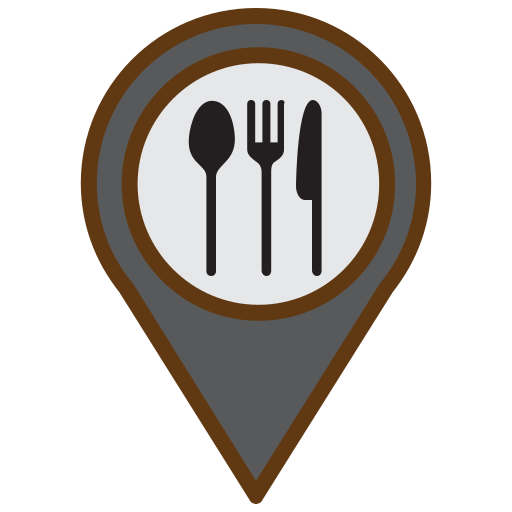
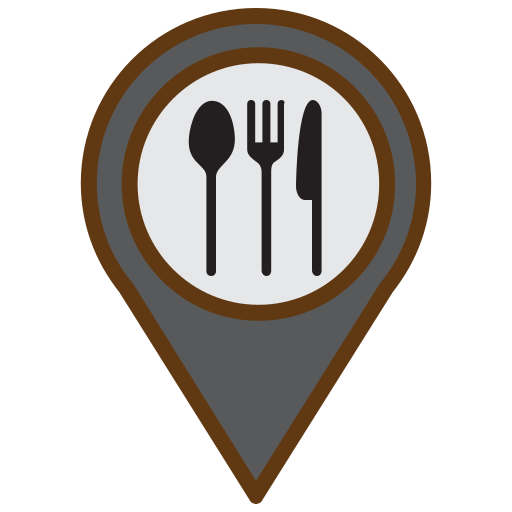
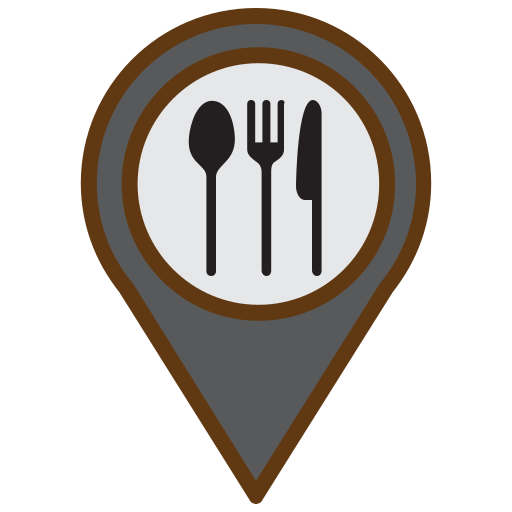
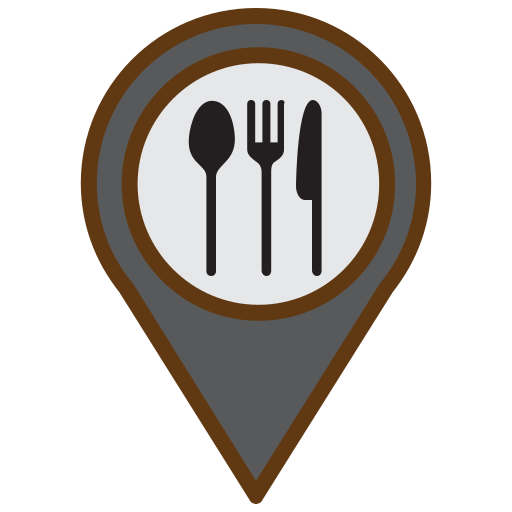
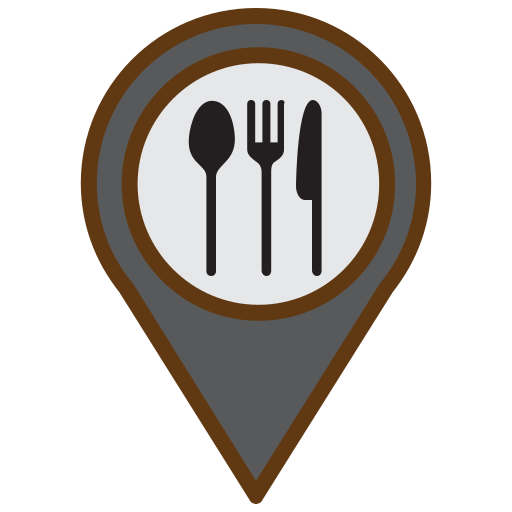
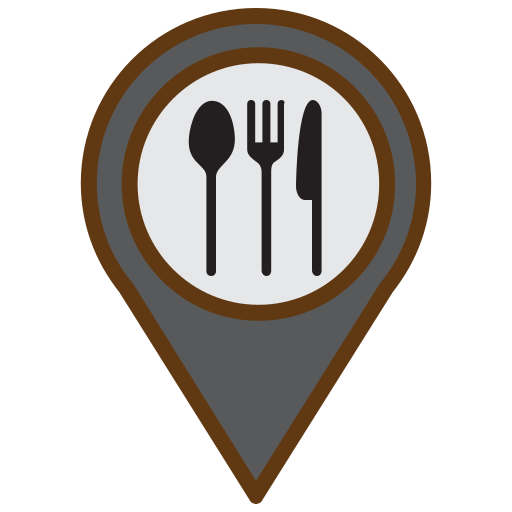
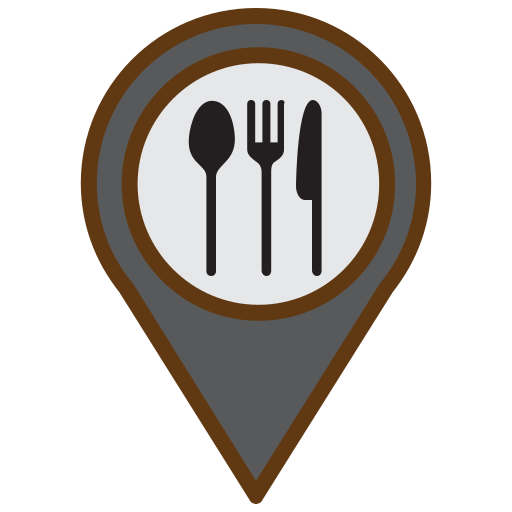
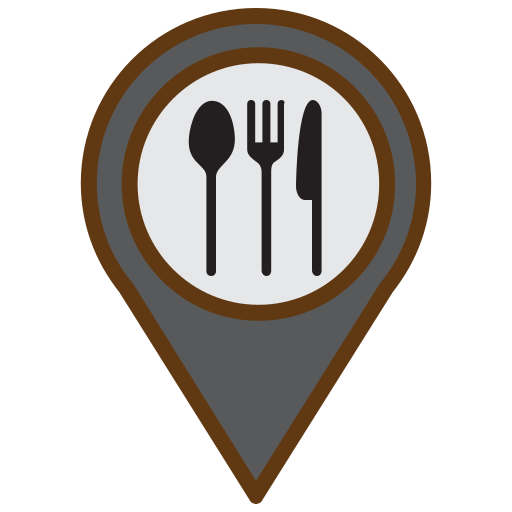
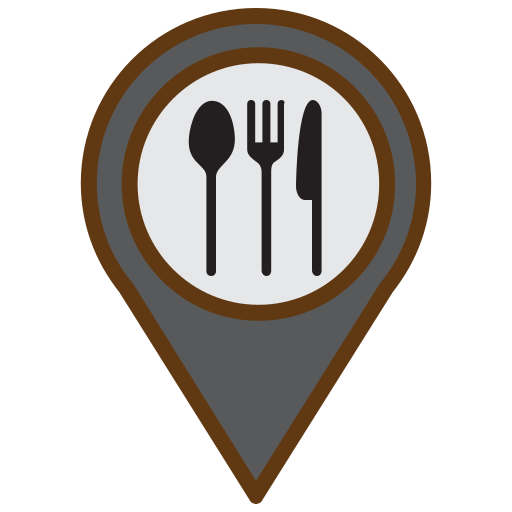
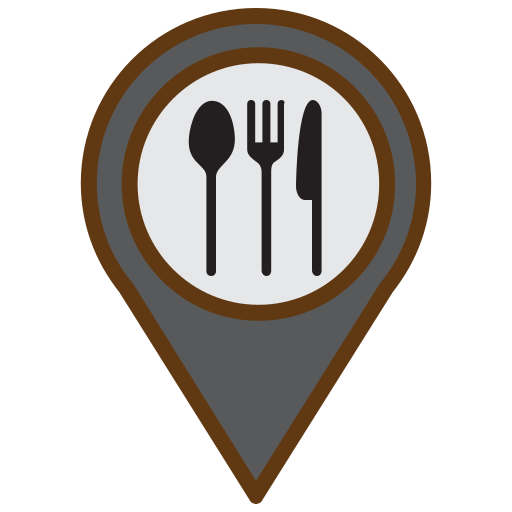
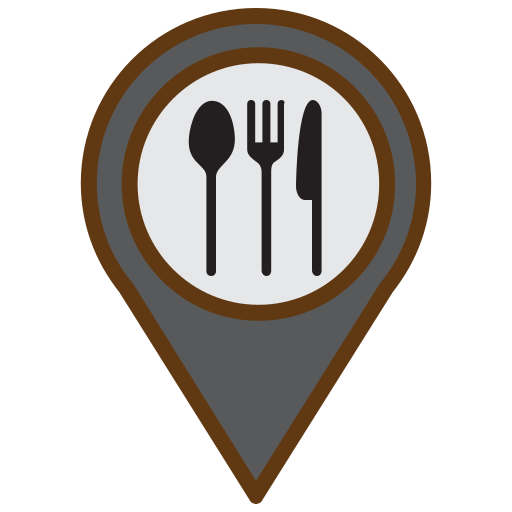
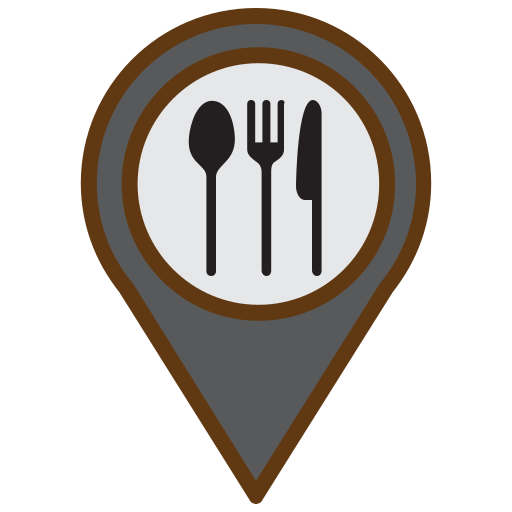
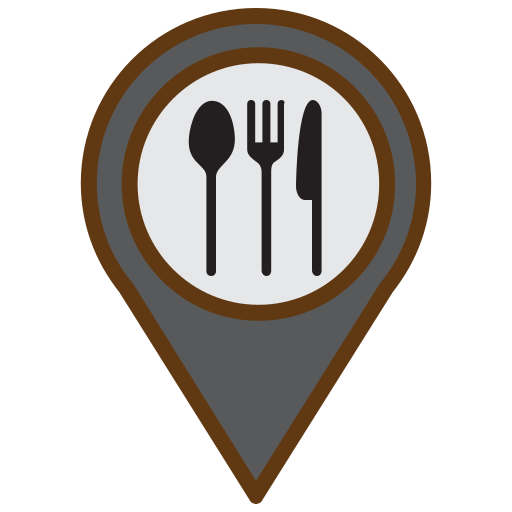
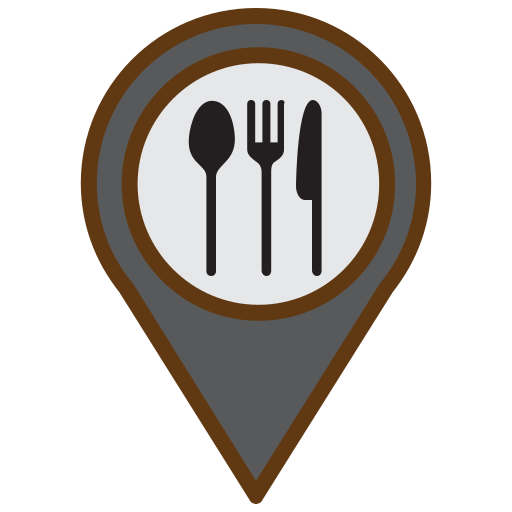
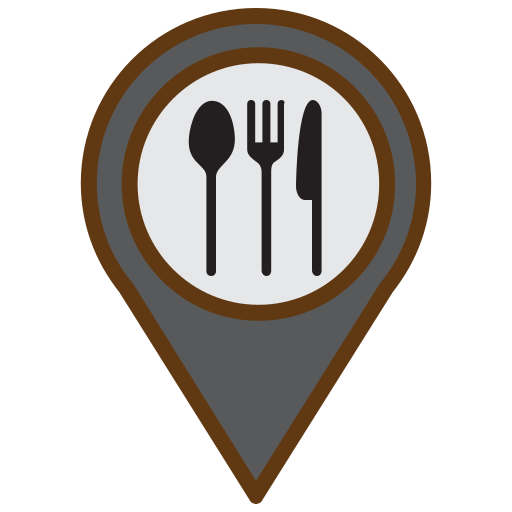
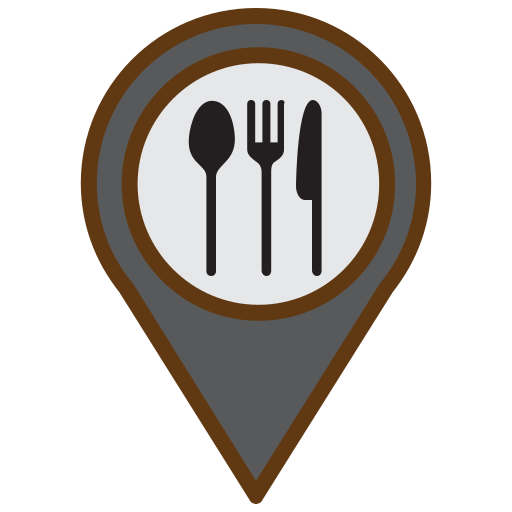
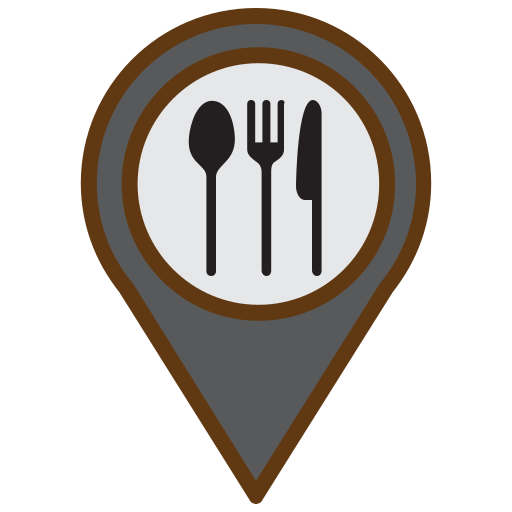
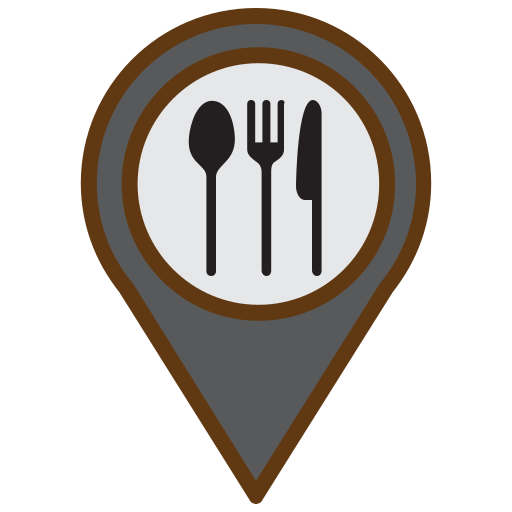
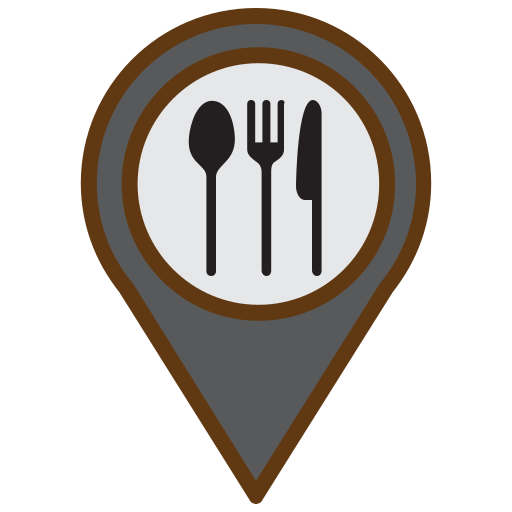
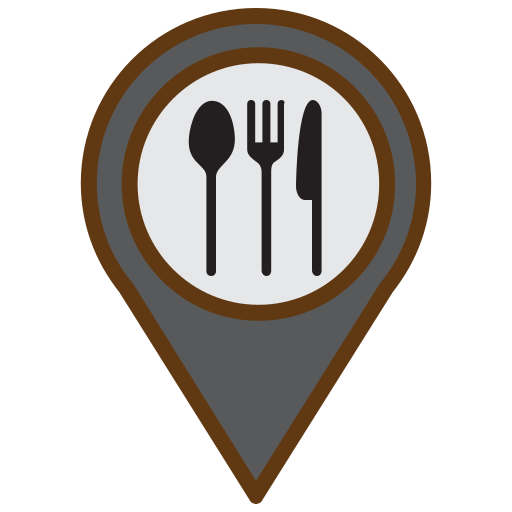
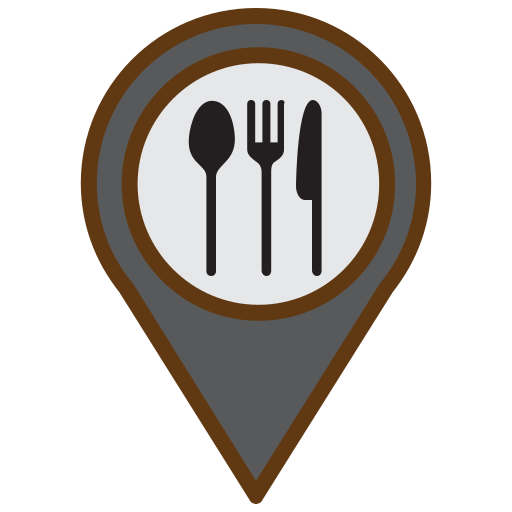
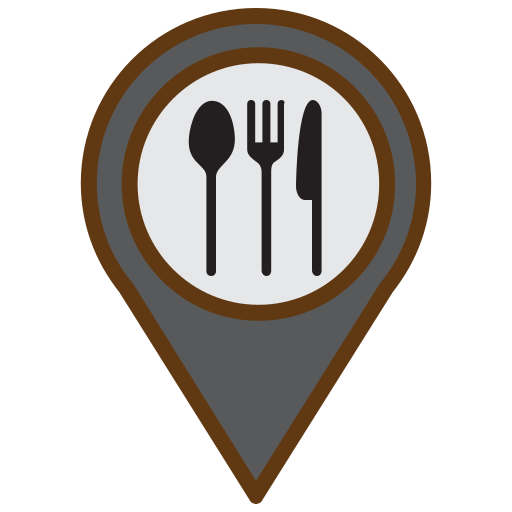
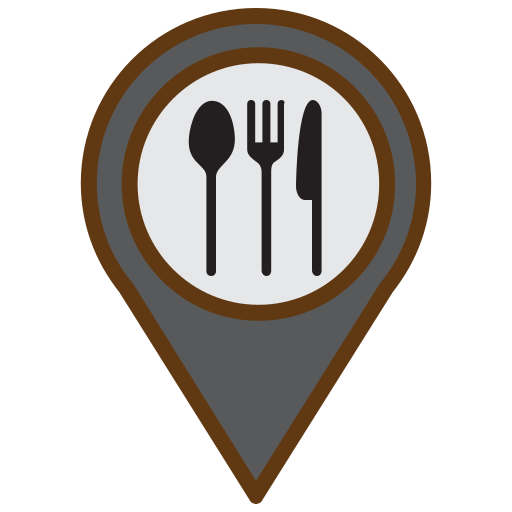
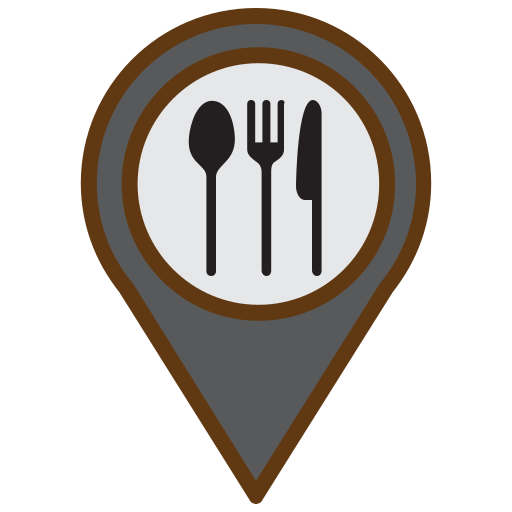
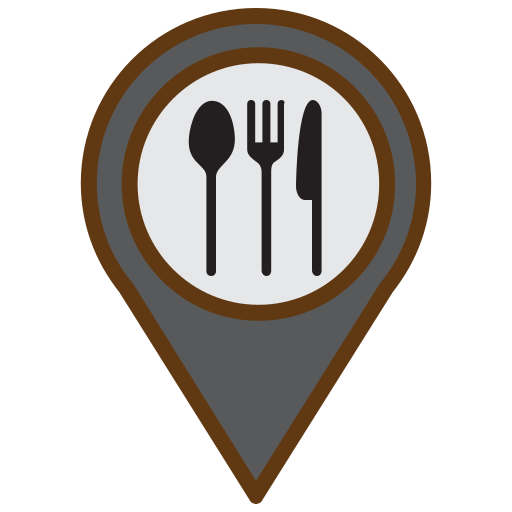
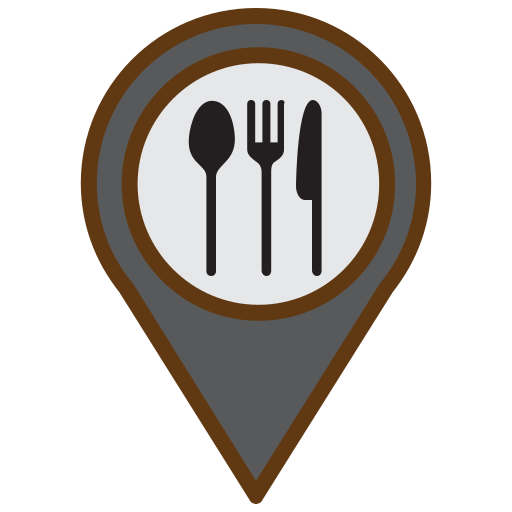
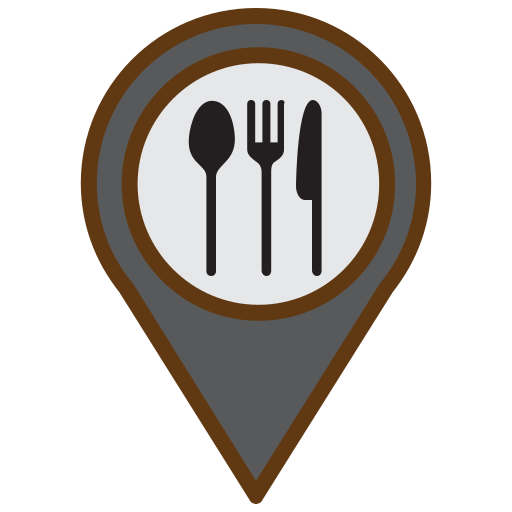
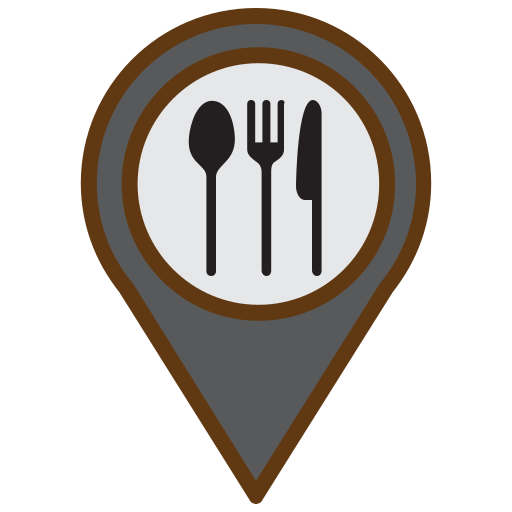
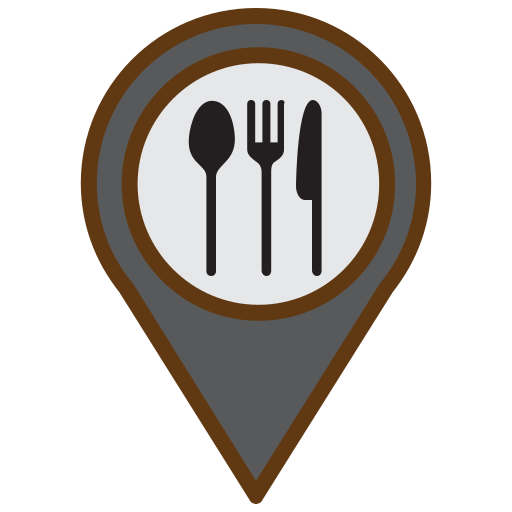
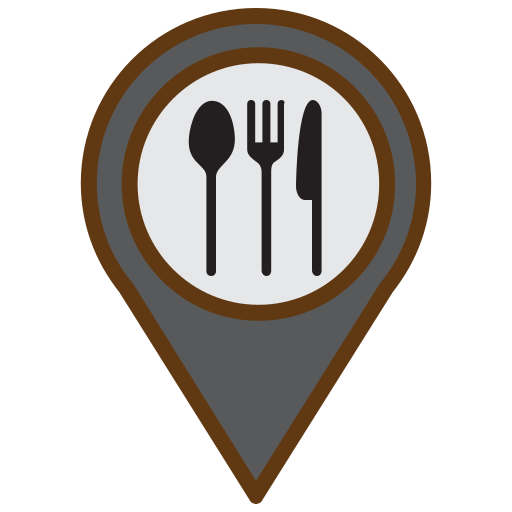
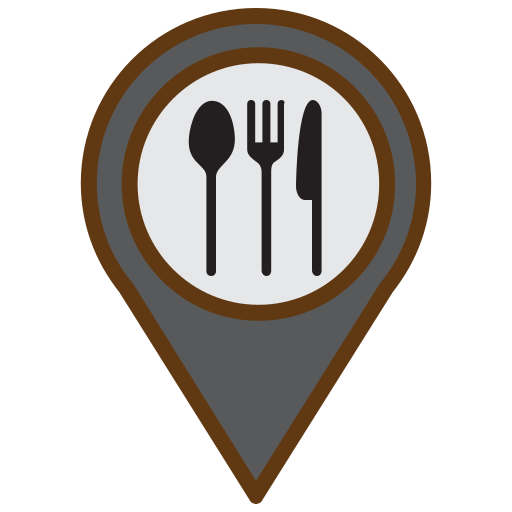
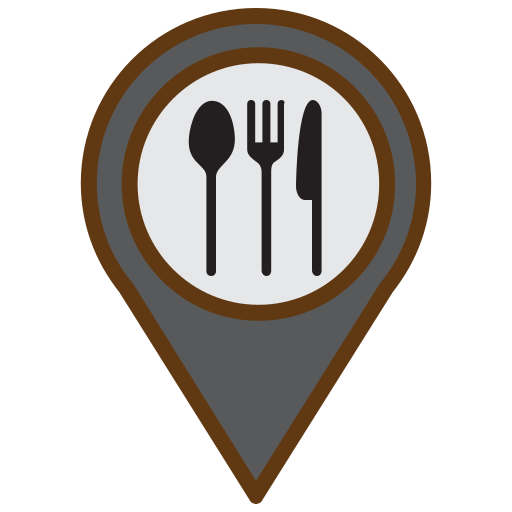
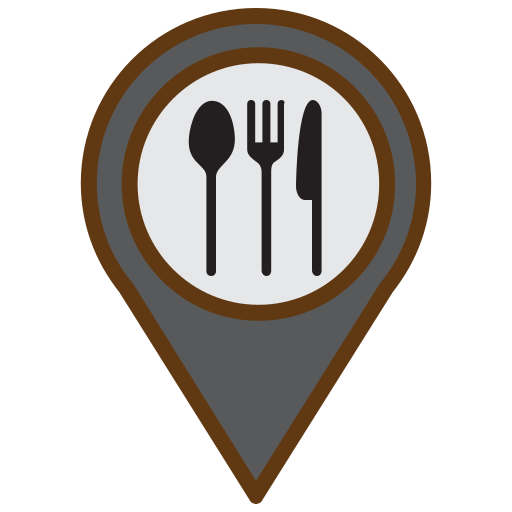
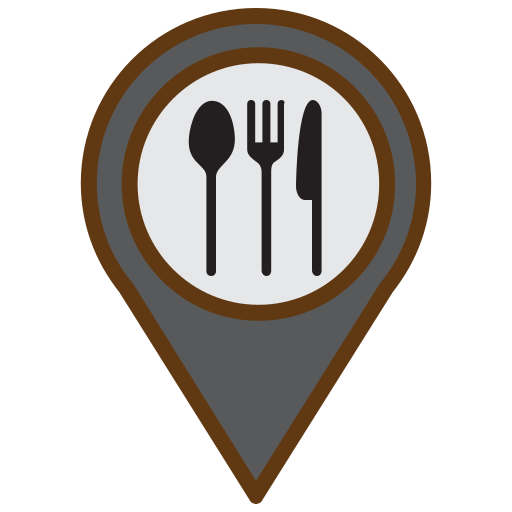
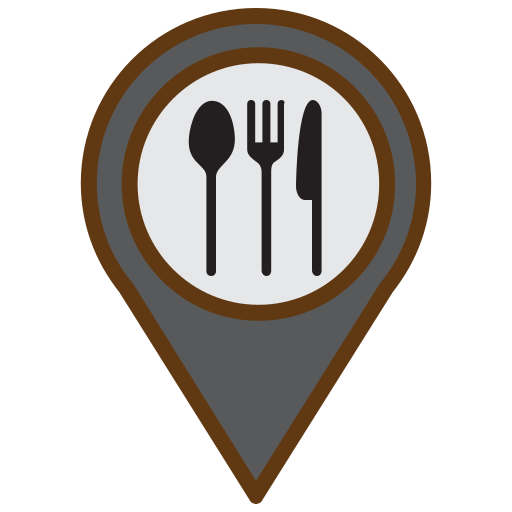
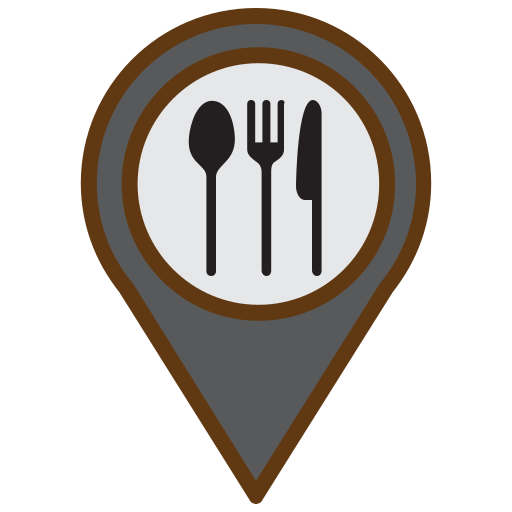
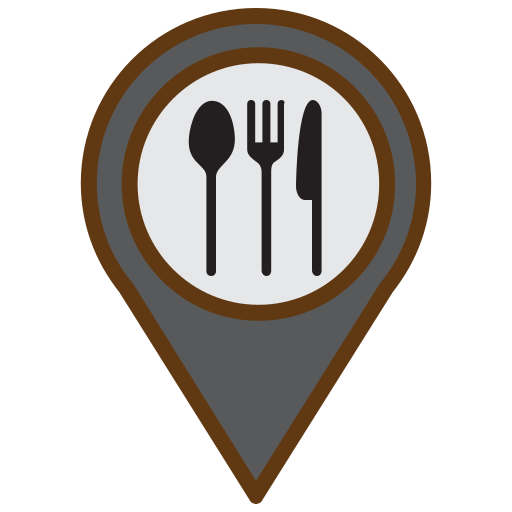
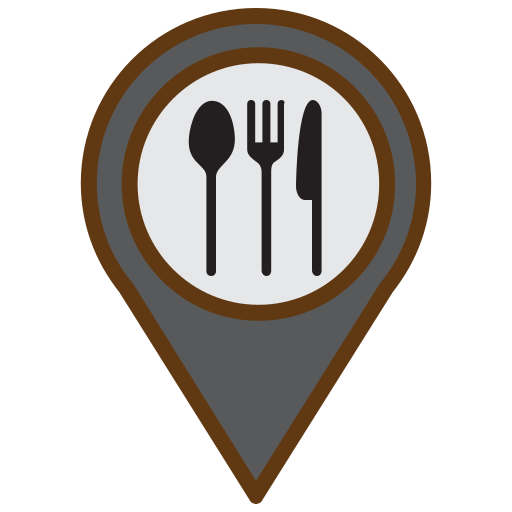
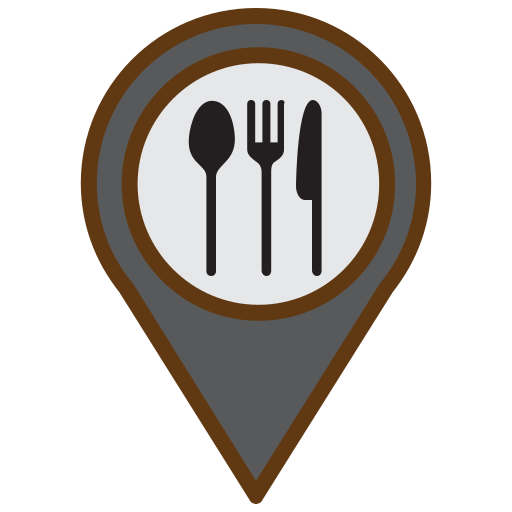
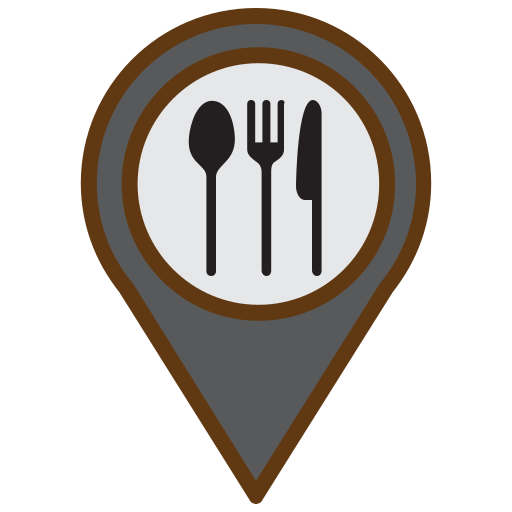
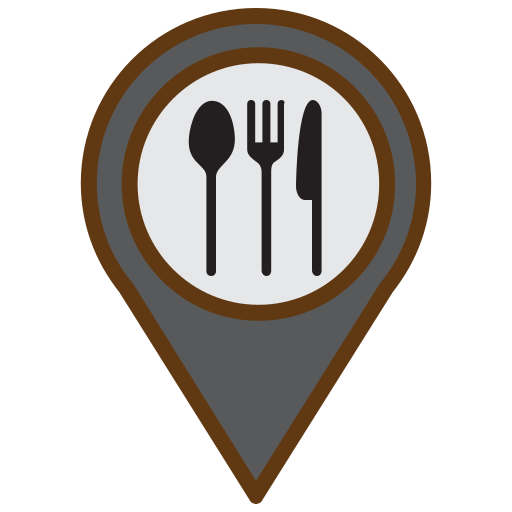
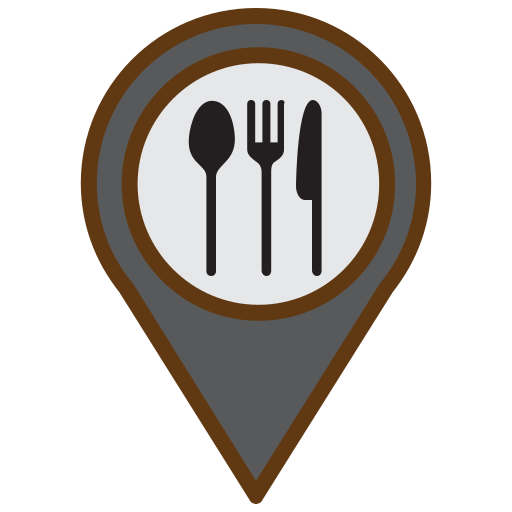
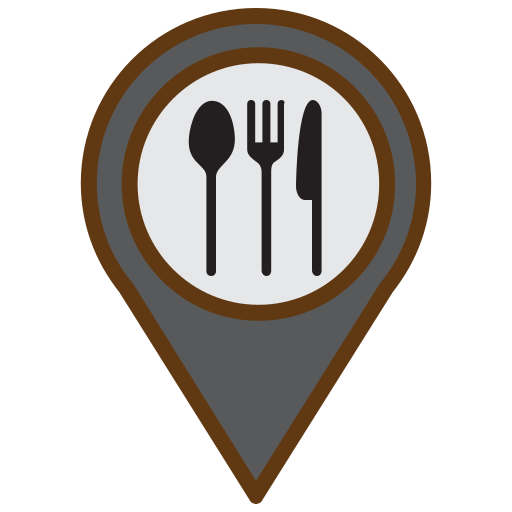
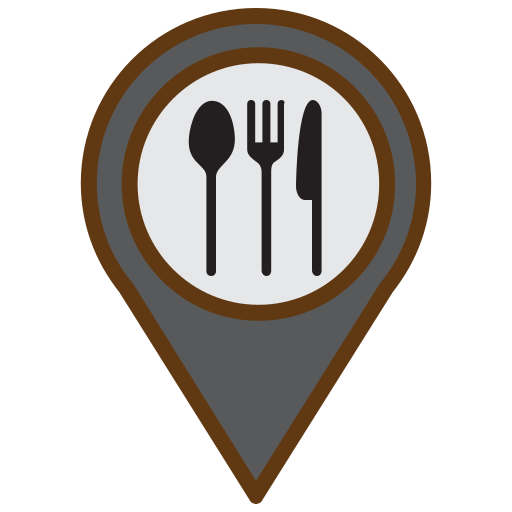
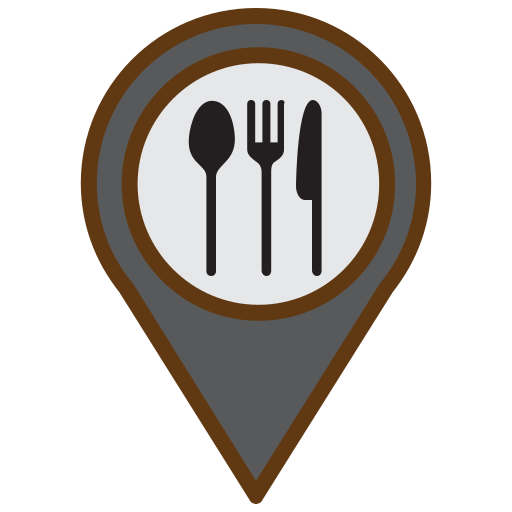
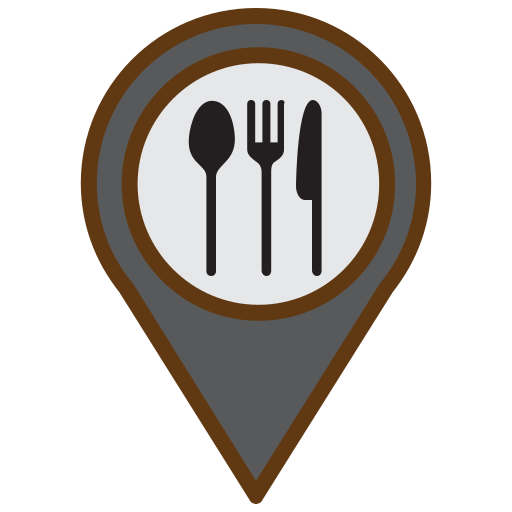
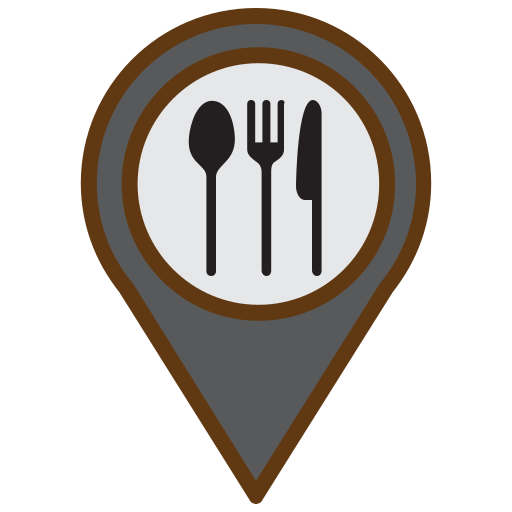
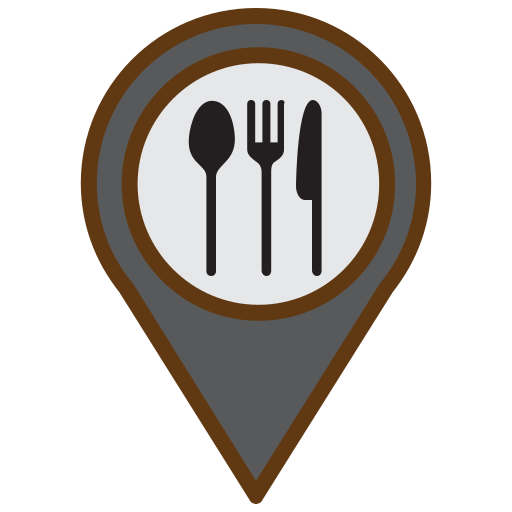
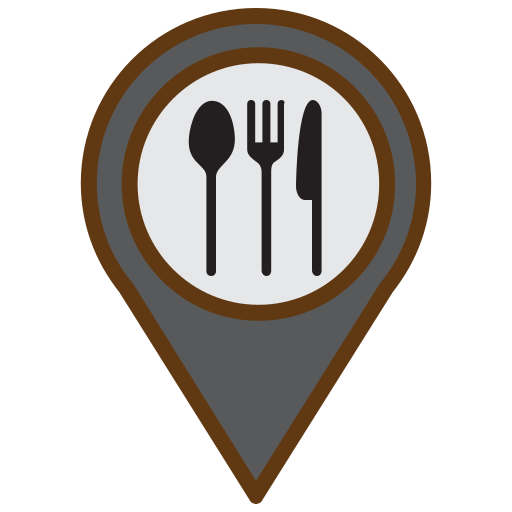
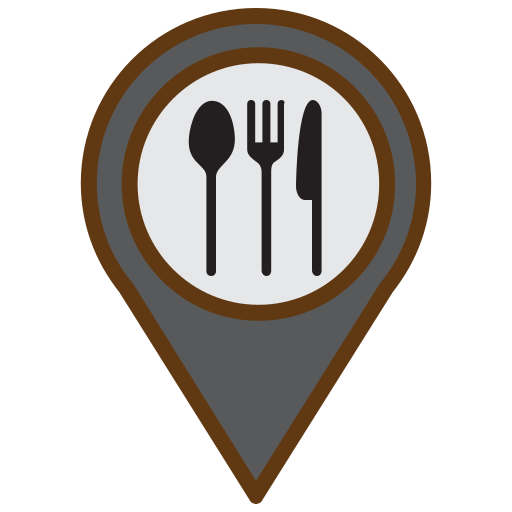
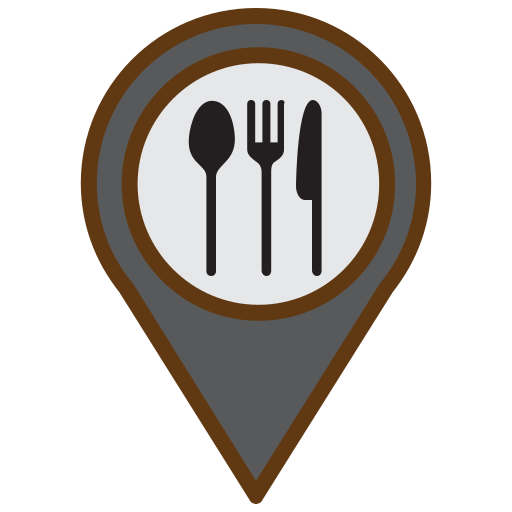
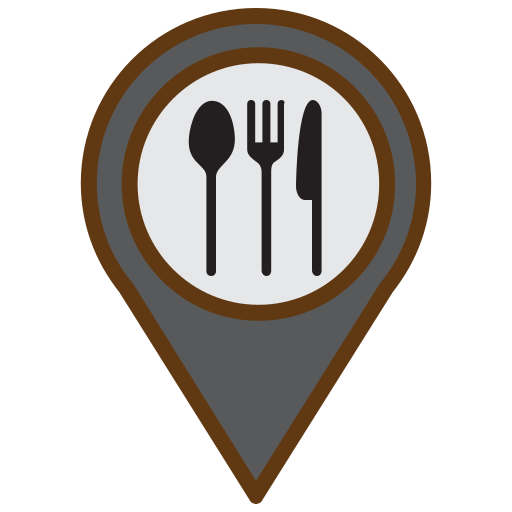
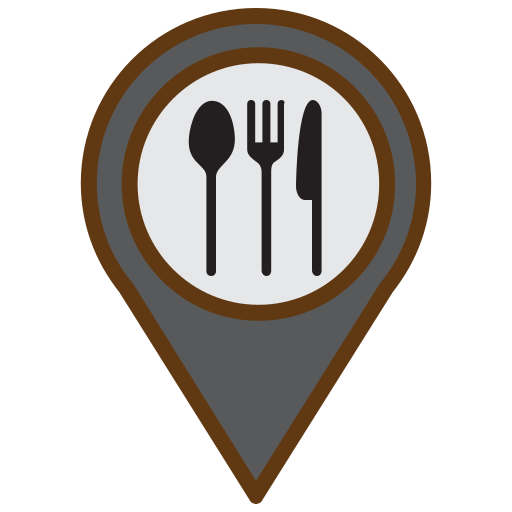
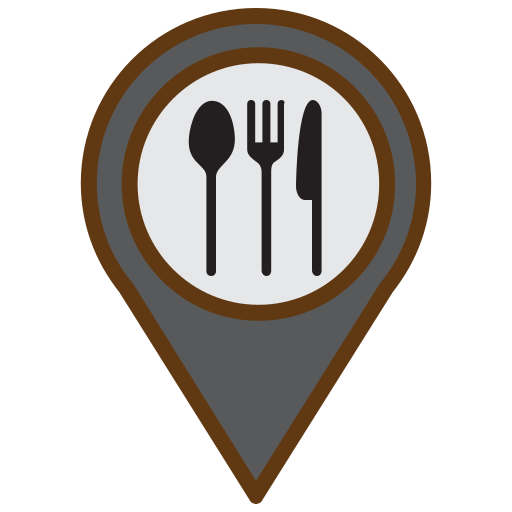
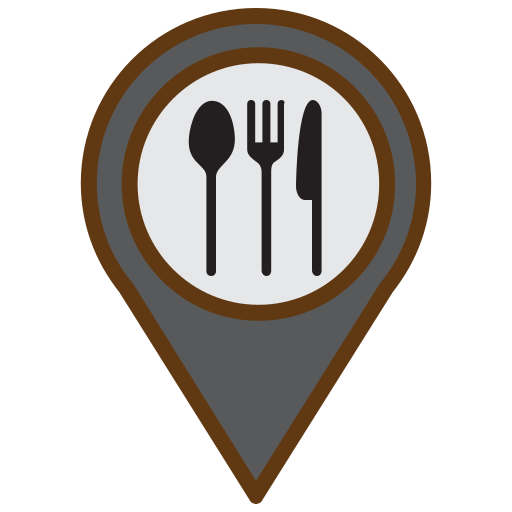
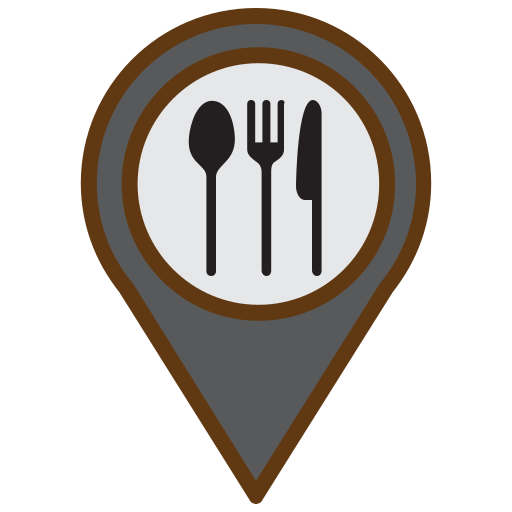
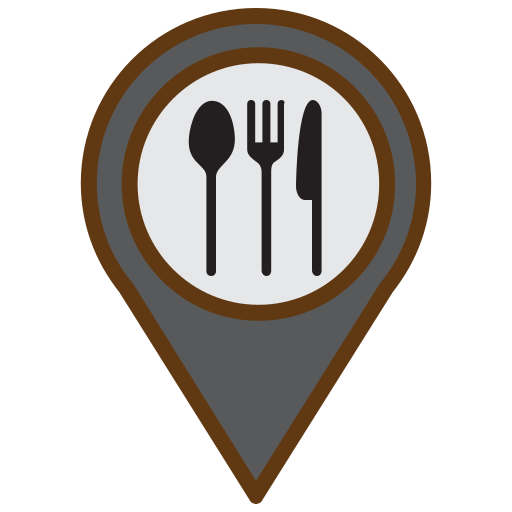
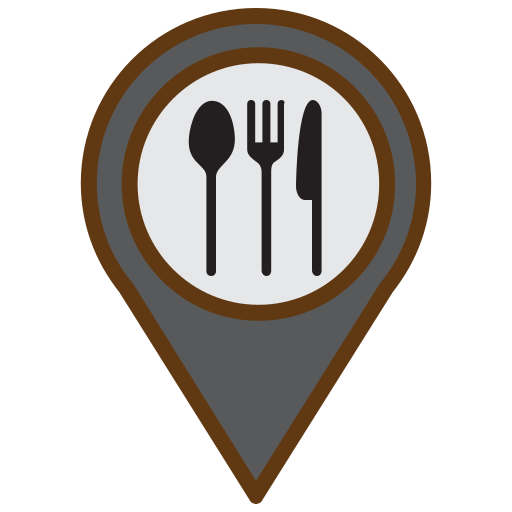
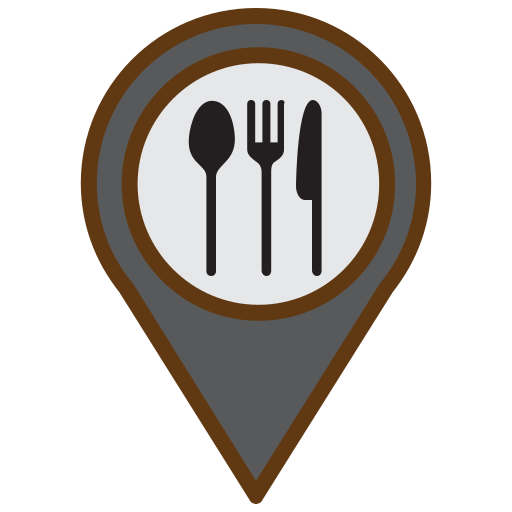
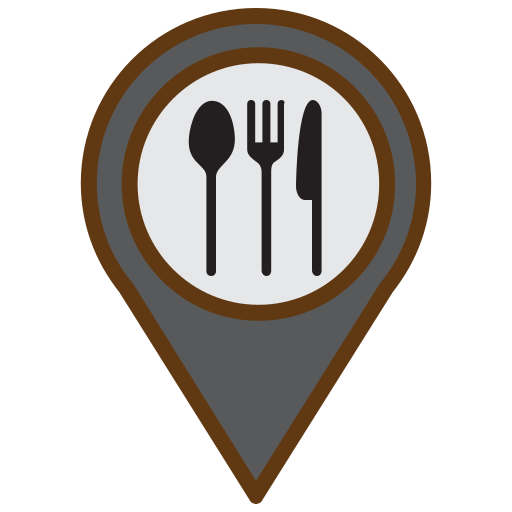
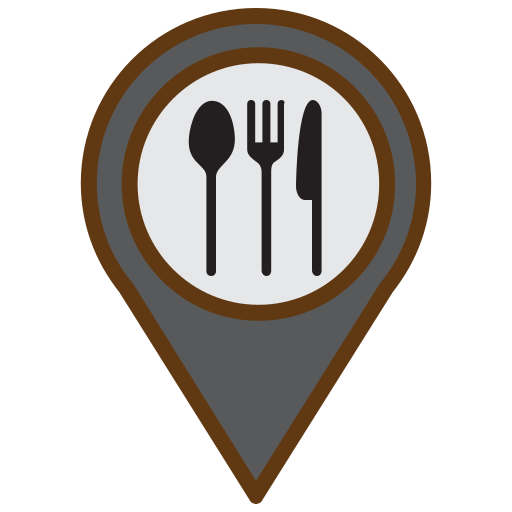
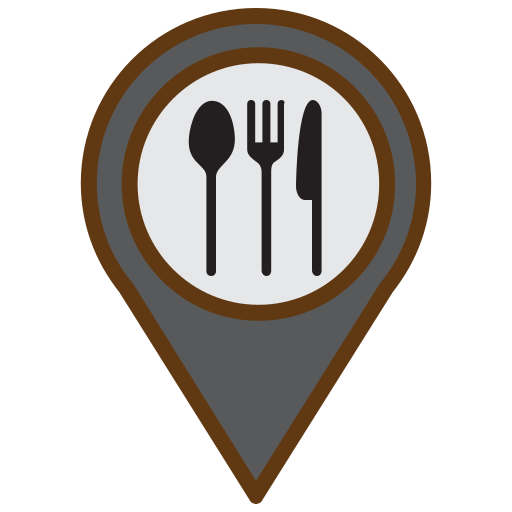

In [8]:
import folium as fm
import json
import os

mapa = fm.Map(location = [23.075162, -82.358295],zoom_start=11)
archivos_json = os.listdir('json') 

for archivo in archivos_json:
    with open(os.path.join('json',archivo),"r", encoding="utf8") as f:
        datos = json.load(f)
        nombre = datos['name']
        latitud, longitud = datos['location']['coordinates_latitude_length']
        icono = fm.CustomIcon(icon_image="icono.png",icon_size = (30,30))
        fm.Marker(location=[latitud,longitud],popup=nombre,icon=icono).add_to(mapa)

mapa